# Actividad Guiada 2
## Autor
Miguel Ángel Álvarez Cabanes
## Github
https://github.com/maalvarezcabanes/algoritmos_optimizacion

## Importación paquetes y funciones auxiliares

In [9]:
import math
import random
import time
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def clean_plot(ax, xlabel, ylabel, title, legend = True, rotate = 45):
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if legend:
        ax.legend(bbox_to_anchor=(1.2, 1))
    if rotate:
        ax.tick_params(axis='x', labelrotation = rotate)

In [30]:
# Realiza el descenso de gradiente dada una expresión del gradiente
def descenso_de_gradiente(grad_f, x0, gamma, tol, maxit):
    x = x0
    trayectoria = []
    for i in range(int(maxit)):
        grad = grad_f(x)
        x = x - gamma * grad
        trayectoria.append(x)
        if np.inner(grad, grad) < tol:
            break
    return trayectoria

# Devuelve una función que es la función gradiente de otra función dada en python
# utilizando sympy de forma simbólica.
def gradiente(func, numvars):
    # Evalua la función para cada uno de los símbolos
    s = []
    for i in range(numvars):
        s.append(sympy.symbols('x' + str(i)))
    func = func(s)
    # Calculate the derivative to calculate the gradient
    d = []
    for i in range(numvars):
        d.append(sympy.diff(func, s[i]))
    d = sympy.Matrix(d)
    # Return a function that evaluates the gradients given the symbols
    func = sympy.lambdify([s], d)
    return lambda x: np.array(func(x)).flatten()

In [46]:
#func = lambda x: x[0]**2 + x[1]**2
func = lambda x: 0.5*x[0]**2
#func = lambda x: math.sin(0.5*x[0]**2 -0.25*x[1]**2 + 3) * math.cos(2*x[0] + 1 - math.exp(x[1]))
#dfunc = lambda x: [2*x[0], 2*x[1]]

La aproximación del punto x con derivada nula es: 3.5280547416398795e-07
El valor de la función en 3.5280547416398795e-07 es 6.223585130003819e-14


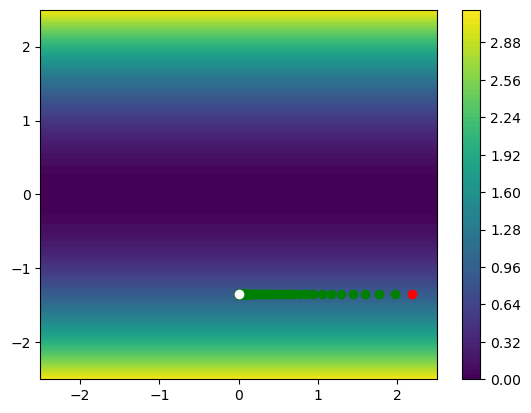

In [47]:
resolucion = 100
rango = 2.5
x_array = np.linspace(-rango, rango, resolucion)
y_array = np.linspace(-rango, rango, resolucion)
z = np.zeros((resolucion, resolucion))

for i,x in enumerate(x_array):
    for j, y in enumerate(y_array):
        z[i, j] = func([x,y])
        
contour = plt.contourf(x_array, y_array, z, resolucion)
cbar = plt.colorbar()

x0 = [random.uniform(-rango, rango), random.uniform(-rango, rango)]
plt.plot(x0[0], x0[1], "o", c="red")

gamma = 0.1
tol=1e-12
maxit=1e5
trayectoria = descenso_de_gradiente(gradiente(func,2), x0, gamma, tol, maxit)
plt.plot([x[0] for x in trayectoria], [x[1] for x in trayectoria], "o", c="green")
plt.plot(trayectoria[-1][0], trayectoria[-1][1], "o", c="white")
print("La aproximación del punto x con derivada nula es: {}".format(x1[0]))
print("El valor de la función en {} es {}".format(x1[0], func(x1)))

plt.show();